In [1]:
import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import main dataset
ev_df = pd.read_csv(Path("../../../../data/processed_data/ev_main_dataset.csv"))

In [3]:
#Examine Data
print("Shape:",ev_df.shape)
display(ev_df.columns)
display(ev_df.head(10))

Shape: (2011, 10)


Index(['year', 'state', 'county', 'zip_codes', 'population',
       'ev_registrations', 'cumulative_ev_stations', 'median_income',
       'ev_adoption_rate', 'ev_growth_rate'],
      dtype='object')

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.000013,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.000026,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000010,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000002,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.000015,NaN
5,2010,CA,Kern County,"[93203, 93205, 93206, 93215, 93216, 93220, 932...",840996,1,0,47089,0.000001,NaN
6,2010,CA,Lake County,"[95422, 95423, 95424, 95426, 95435, 95443, 954...",64735,1,0,39491,0.000015,NaN
7,2010,CA,Los Angeles County,"[90001, 90002, 90003, 90004, 90005, 90006, 900...",9823246,360,21,55476,0.000037,NaN
8,2010,CA,Marin County,"[94901, 94903, 94904, 94912, 94913, 94914, 949...",252904,15,0,89268,0.000059,NaN
9,2010,CA,Monterey County,"[93426, 93450, 93901, 93902, 93905, 93906, 939...",416373,1,0,59271,0.000002,NaN


In [4]:
#Pull only California values
ca_df = ev_df[ev_df["state"] == "CA"].sort_values(["year","state","county"]).reset_index(drop=True)

ca_df.head(10)

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.000013,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.000026,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000010,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000002,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.000015,NaN
5,2010,CA,Kern County,"[93203, 93205, 93206, 93215, 93216, 93220, 932...",840996,1,0,47089,0.000001,NaN
6,2010,CA,Lake County,"[95422, 95423, 95424, 95426, 95435, 95443, 954...",64735,1,0,39491,0.000015,NaN
7,2010,CA,Los Angeles County,"[90001, 90002, 90003, 90004, 90005, 90006, 900...",9823246,360,21,55476,0.000037,NaN
8,2010,CA,Marin County,"[94901, 94903, 94904, 94912, 94913, 94914, 949...",252904,15,0,89268,0.000059,NaN
9,2010,CA,Monterey County,"[93426, 93450, 93901, 93902, 93905, 93906, 939...",416373,1,0,59271,0.000002,NaN


In [5]:
#Trim to EV Stations and Median Income
ca_ev_df = ca_df[["year","county","cumulative_ev_stations","median_income"]]

print(ca_ev_df.info())

ca_ev_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    589 non-null    int64 
 1   county                  589 non-null    object
 2   cumulative_ev_stations  589 non-null    int64 
 3   median_income           589 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 18.5+ KB
None


,year,county,cumulative_ev_stations,median_income
0,2010,Alameda County,0,69384
1,2010,Amador County,1,54758
2,2010,Contra Costa County,0,78385
3,2010,Fresno County,0,46430
4,2010,Humboldt County,0,40089
5,2010,Kern County,0,47089
6,2010,Lake County,0,39491
7,2010,Los Angeles County,21,55476
8,2010,Marin County,0,89268
9,2010,Monterey County,0,59271


<function matplotlib.pyplot.show(close=None, block=None)>

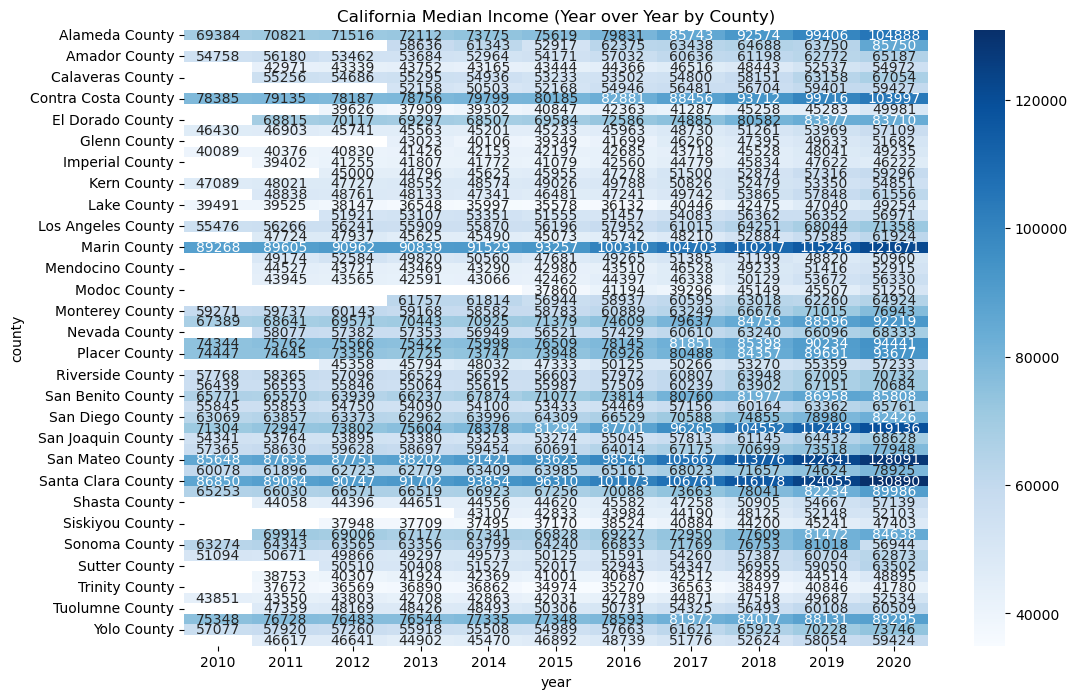

In [6]:
#Generate Heatmap to chart Median income by year per county
ca_income_pivot = ca_ev_df.pivot_table(index="county", columns="year", values= "median_income")
plt.figure(figsize=(12,8))
sns.heatmap(ca_income_pivot, cmap="Blues", annot=True, fmt=".0f")
plt.title("California Median Income (Year over Year by County)")
plt.show

In [7]:
# #Generate Heatmap to chart top 10 Median income by year per county

# #ca_income_sort = ca_ev_df.sort_values(by="median_income", ascending=False)

# #ca_df = ev_df[ev_df["state"] == "CA"].sort_values(["year","state","county"]).reset_index(drop=True)

# ca_top_10 = ca_ev_df[ca_ev_df["year"] == "2020"].sort_values(by="median_income", ascending=False)

# ca_income_10 = ca_top_10.head(10)

# ca_income_10

In [8]:
# ca_income_pivot = ca_ev_df.pivot_table(index="county", columns="year", values= "median_income")
# plt.figure(figsize=(12,8))
# sns.heatmap(ca_income_pivot, cmap="Blues", annot=True, fmt=".0f")
# plt.title("California Median Income (Year over Year by County)")
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

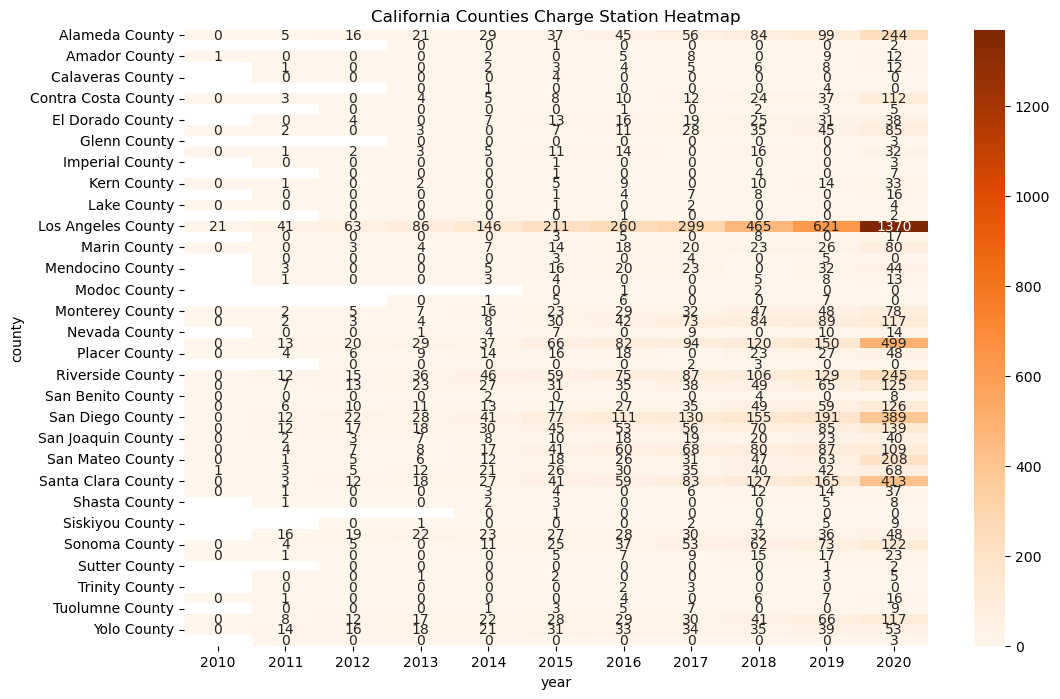

In [9]:
#Generate Heatmap to chart charging station infrastructure by year per county
ca_charge_pivot = ca_ev_df.pivot_table(index="county", columns="year", values= "cumulative_ev_stations")
plt.figure(figsize=(12,8))
sns.heatmap(ca_charge_pivot, cmap="Oranges", annot=True, fmt=".0f")
plt.title("California Counties Charge Station Heatmap")
plt.show